In [3]:
%matplotlib inline
import PIL 
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import os
import numpy as np
import random

img_size = 128
channel=3
dataset_name='cell_images'
train_proportion=0.7 # train set 비율 결정

train_imgs = []
train_imgs_1=[]
train_imgs_2=[]
train_labels = []
train_labels_1=[]
train_labels_2=[]
test_imgs=[]
test_imgs_1=[]
test_imgs_2=[]
test_labels=[]
test_labels_1=[]
test_labels_2=[]

In [5]:
folder='Uninfected'
list_uninfected_number=len(os.listdir('./{}/{}'.format(dataset_name,folder)))
list_uninfected=list(range(list_uninfected_number))

folder='Parasitized'
list_parasitized_number=len(os.listdir('./{}/{}'.format(dataset_name,folder)))
list_parasitized=list(range(list_parasitized_number))

random.seed(123)
train_set1_list=random.sample(list_uninfected,int(list_uninfected_number*train_proportion))
train_set2_list=random.sample(list_parasitized,int(list_parasitized_number*train_proportion))

test_set1_list=list(set(list_uninfected)-set(train_set1_list))
test_set2_list=list(set(list_parasitized)-set(train_set2_list))

test_set1_list.sort()
test_set2_list.sort()

In [6]:
#train image generation 

# Trainset from Uninfected list
folder='Uninfected'
for list_num in train_set1_list:
    try:
        file=os.listdir('./{}/{}'.format(dataset_name,folder))[list_num]
        file_path='./{}/{}/{}'.format(dataset_name,folder,file)
        img=Image.open(file_path)
        img=img.resize((128,128))
    
        label_onehot = np.array([0,1])
        train_imgs_1.append(np.array(img).reshape(channel*img_size*img_size))
        train_labels_1.append(label_onehot)
    except:
        pass
    
# Trainset from Uninfected list
folder='Parasitized'
for list_num in train_set2_list:
    try:
        file=os.listdir('./{}/{}'.format(dataset_name,folder))[list_num]
        file_path='./{}/{}/{}'.format(dataset_name,folder,file)
        img=Image.open(file_path)
        img=img.resize((128,128))
    
        label_onehot = np.array([1,0])
        train_imgs_2.append(np.array(img).reshape(channel*img_size*img_size))
        train_labels_2.append(label_onehot)
    except:
        pass
    



# Testset from Uninfected list
folder='Uninfected'
for list_num in test_set1_list:
    try:
        file=os.listdir('./{}/{}'.format(dataset_name,folder))[list_num]
        file_path='./{}/{}/{}'.format(dataset_name,folder,file)
        img=Image.open(file_path)
        img=img.resize((128,128))
    
        label_onehot = np.array([0,1])
        test_imgs_1.append(np.array(img).reshape(channel*img_size*img_size))
        test_labels_1.append(label_onehot)
    except:
        pass

# Testset from Uninfected list
folder='Parasitized'
for list_num in test_set2_list:
    try:
        file=os.listdir('./{}/{}'.format(dataset_name,folder))[list_num]
        file_path='./{}/{}/{}'.format(dataset_name,folder,file)
        img=Image.open(file_path)
        img=img.resize((128,128))
    
        label_onehot = np.array([1,1])
        test_imgs_2.append(np.array(img).reshape(channel*img_size*img_size))
        test_labels_2.append(label_onehot)
    except:
        pass
    


In [17]:
a=np.array(test_imgs_1)
b=np.array(test_imgs_2)
test_imgs=np.vstack((a,b))/255

c=np.array(test_labels_1)
d=np.array(test_labels_2)
test_labels=np.vstack((c,d))

a=np.array(train_imgs_1)
b=np.array(train_imgs_2)
train_imgs=np.vstack((a,b))/255

c=np.array(train_labels_1)
d=np.array(train_labels_2)
train_labels=np.vstack((c,d))

In [21]:
# array reshape 
train_imgs=np.array(train_imgs).reshape(len(train_imgs),128,128,3)
train_labels=np.array(train_labels).reshape(len(train_labels),2)

test_imgs=np.array(test_imgs).reshape(len(test_imgs),128,128,3)
test_labels=np.array(test_labels).reshape(len(test_labels),2)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [22]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='linear'))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [23]:
adam=keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 5) # 조기종료 콜백함수 정의

hist = model.fit(train_imgs, train_labels, epochs=20, batch_size=64,
                 validation_data=(test_imgs, test_labels),
                 callbacks=[early_stopping])

Train on 19289 samples, validate on 8269 samples
Epoch 1/20
19289/19289 [==============================] - 21s 1ms/step - loss: 0.3137 - acc: 0.8505 - val_loss: 4.6996 - val_acc: 0.9543
Epoch 2/20
19289/19289 [==============================] - 20s 1ms/step - loss: 0.1457 - acc: 0.9539 - val_loss: 4.3489 - val_acc: 0.9561
Epoch 3/20
19289/19289 [==============================] - 20s 1ms/step - loss: 0.1292 - acc: 0.9578 - val_loss: 4.6687 - val_acc: 0.9545
Epoch 4/20
19289/19289 [==============================] - 20s 1ms/step - loss: 0.1221 - acc: 0.9597 - val_loss: 5.1824 - val_acc: 0.9568
Epoch 5/20
19289/19289 [==============================] - 20s 1ms/step - loss: 0.1148 - acc: 0.9612 - val_loss: 5.0440 - val_acc: 0.9554
Epoch 6/20
19289/19289 [==============================] - 20s 1ms/step - loss: 0.1102 - acc: 0.9627 - val_loss: 4.3090 - val_acc: 0.9539
Epoch 7/20
19289/19289 [==============================] - 20s 1ms/step - loss: 0.1010 - acc: 0.9654 - val_loss: 4.9166 - val_acc:

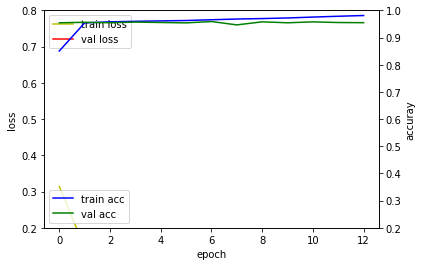

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.2, 0.8])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.2, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()